# Support Vector Machines
### by [Richard W. Evans](https://sites.google.com/site/rickecon/), March 2019
The code in this Jupyter notebook was written using Python 3.6. It uses data files ?. For the code to run properly, you will either need to have access to the internet or you should have the data file in the same folder as the Jupyter notebook file. Otherwise, you will have to change the respective lines of the code that read in the data to reflect the location of that data.

This notebook follows some of the material in James, et al (2013, Ch. 9). Most of the sections in this notebook will build to the Support Vector Machines (SVM) binary classifier method. However, we will make reference to more general $K>2$ categorical dependent variable versions of SVM. We will cover:

1. Maximal margin classifier
2. Support vector classifier
3. Support vector machines
4. SVM ensemble for general categorical data

SVM is generally thought of as the best binary classifier. People often loosely refer to the maximal margin classifier and the support vector classifier as support vector machines. However, this notebook will differentiate among these three methods. We will use the maximal margin classifier and support vector classifier as pedagogical steps to understanding the more general support vector machines.

## 1. Separating hyperplanes and maximal margin classifier
Let $N$ observations $y_i$ indexed by $i=\{1,2,...N\}$ be classified into two categories $y_i\in\{-1,1\}$. Note that this is different than the binary classification $\{0,1\}$ that we have used in previous binary classifiers. This distinction of using the set $\{-1,1\}$ is simply a normalization, but it provides some nice mathematical help for the maximal margin classifier (and SVM more generally). For now, assume that $y_i$ is predicted by two features $X_{1,i}$ and $X_{2,i}$.

As a general definition, let the feature space $\mathcal{S}^P$ have $P$ dimensions ($X_1, X_2,...X_P$). We can define a *hyperplane*, generally, as a $P-1$ dimensional affine subspace of $\mathcal{S}^P$ defined by the following equation.

$$ \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ...\beta_P X_P = 0 $$

In our example above with two feature variables $P=2$ ($X_1, X_2$), the feature space could be represented as a square with each data point being represented by a point $(X_{1,i},X_{2,i})$. A hyperplane through $\mathcal{S}^2$ space is a line defined by,

$$ \beta_0 + \beta_1 X_1 + \beta_2 X_2 = 0 $$

which is a one-dimensional ($P-1$) object. Figure 9.1 from James, et at (2013) shows a hyperplane $1 + 2X_1 + 3X_2 = 0$ through $\mathcal{S}^2$ space. The blue region is the set of points for which $1 + 2X_1 + 3X_2 > 0$ and the red region is the set of points for which $1 + 2X_1 + 3X_2 < 0$.

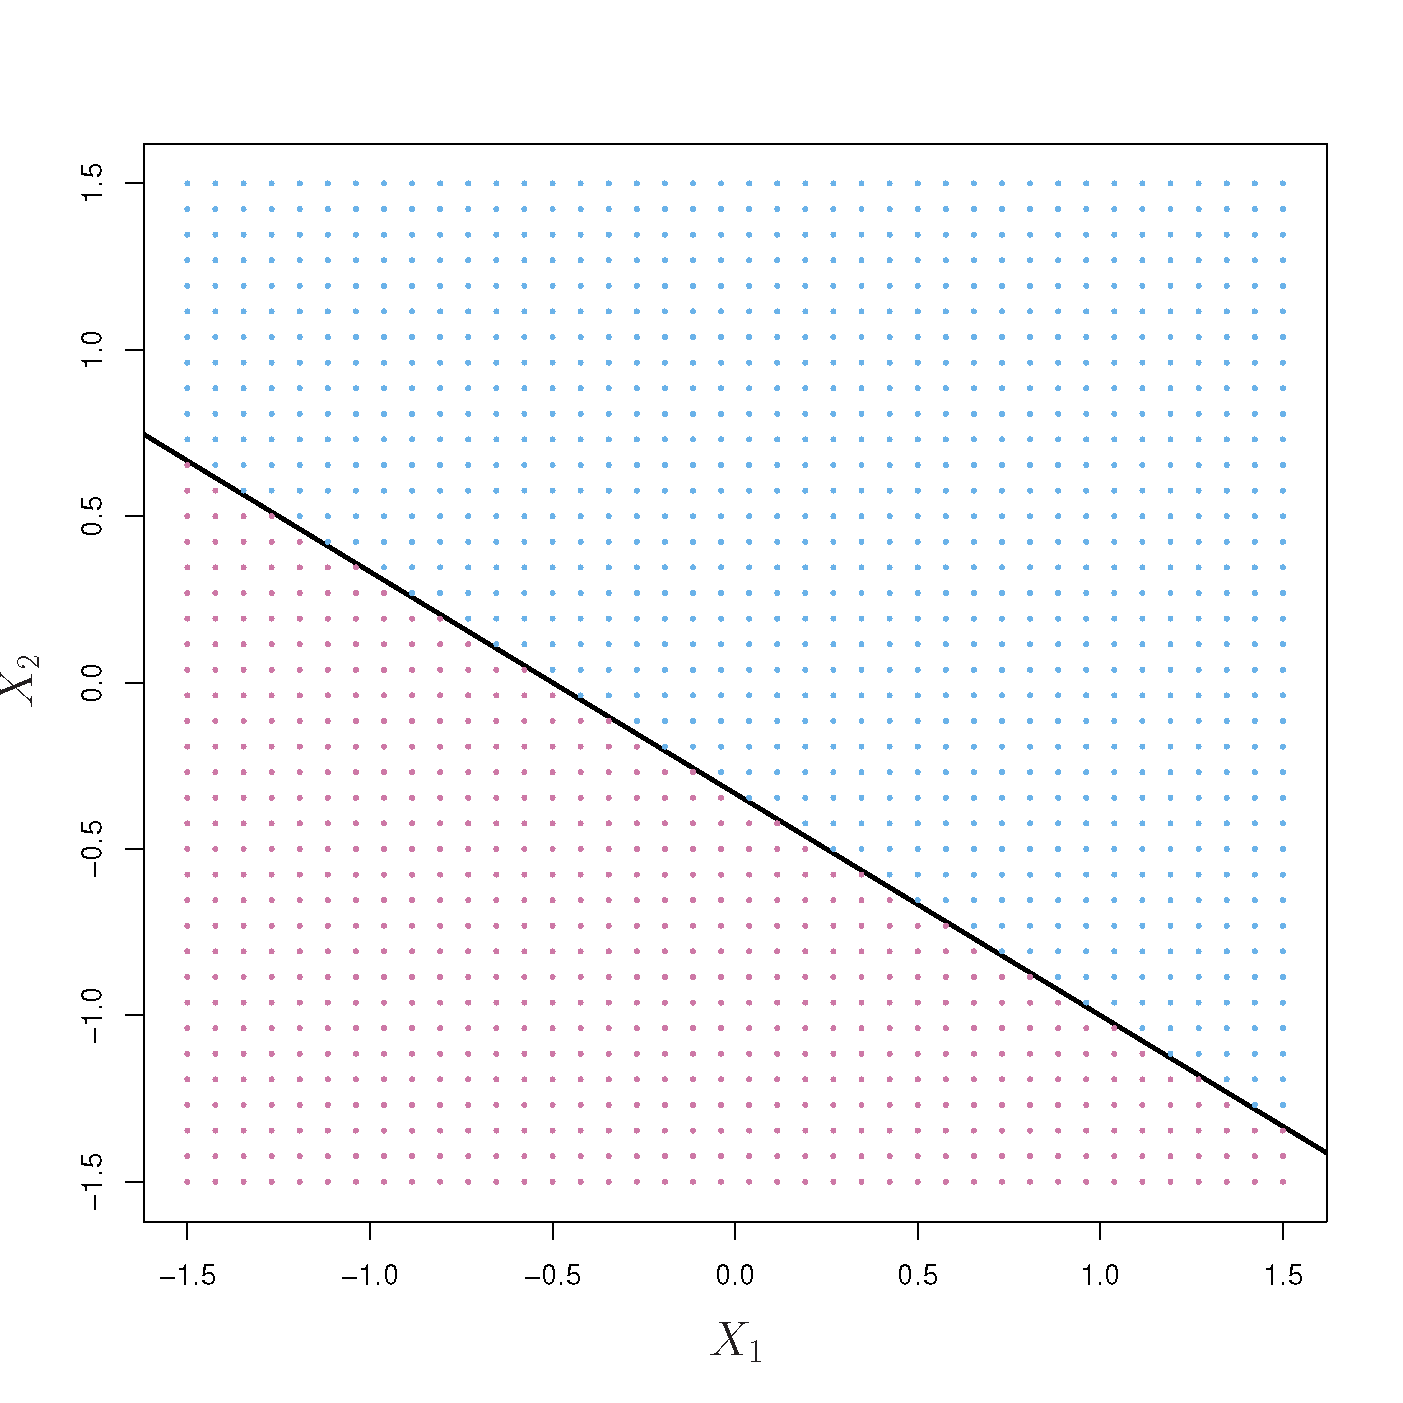

More generally, a hyperplane separates the $P$-dimensional feature space into two regions. In one region, $\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ...\beta_P X_P > 0$, and in the other region $\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ...\beta_P X_P < 0$.

We call the feature data $(X_1, X_2, ... X_P)$ $separable$ if there exists a hyperplane $\beta^P\equiv\{\beta_0,\beta_1,\beta_2,...\beta_P\}$ perfectly classifies the binary data such that for all $y_i=1$, $\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ...\beta_P X_P > 0$ and for all $y_i=-1$, $\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ...\beta_P X_P < 0$. Figure 9.2 from James, et al (2013) shows a four *separating hyperplanes* that satisfy this condition.

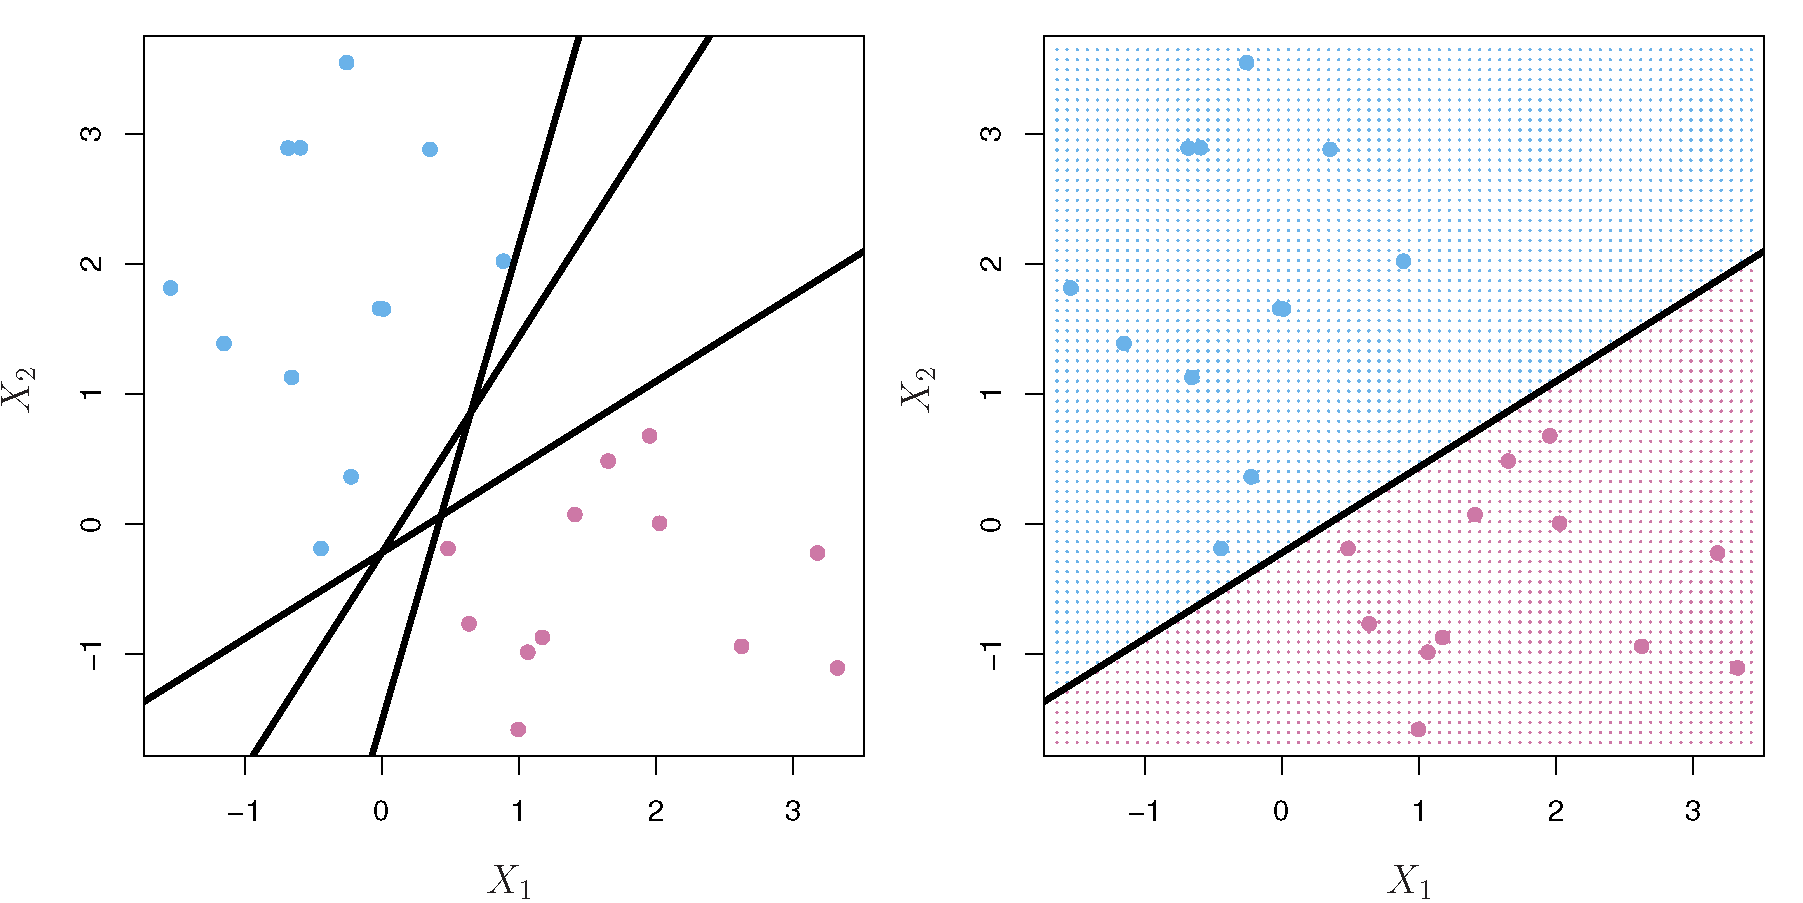

A separating hyperplane has the following three properties.

1. $\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ...\beta_P X_P > 0$ for all $y_i = 1$
2. $\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ...\beta_P X_P < 0$ for all $y_i = -1$
3. $y_i\left(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ...\beta_P X_P\right) = 0$

That third condition will be important later on.

A separating hyperplane classifies test observation $X_j=(X_{1,j},X_{2,j}, ... X_{P,j})$ based on the sign of $f(X_j) = \beta_0 + \beta_1 X_{1,j} + \beta_2 X_{2,j} + ...\beta_P X_{P,j}$. If $f(X_j)>0$, then $\hat{y}_j=1$. "If $f(X_j)<0$, then $\hat{y}_j=-1$. We can also make use of the magnitude of $f(X_j)$. If $f(X_j)$ is far from zero, this means that $X_j$ is far from the hyperplane, and we can be confident about our class assignment for $X_j$. On the other hand, if $f(X_j)$ is close to zero, this means that $X_j$ is close to the hyperplane, and we are less certain about our class assignment for $X_j$.

The *maximal margin classifier* is a linear boundary classifier based on a separating hyperplane. As can be seen in Figure 9.2 above, if the data are separable, then, in general, an infinite number of separating hyperplanes exist. The maximal margin classifier is defined by the separating hyperplane with the maximum distance from the closest observation.

Define the margin $M$ as the minimum distance from the hyperplane to the closest observation. The maximal margin classifier is defined by the maximal margin hyperplane for which the margin $M$ is largest.

$$ \max_{\beta_1,\beta_2,...\beta_P, M}\quad M $$
$$ \text{s.t}\quad \sum_{j=1}^P\beta^2_j = 1 $$
$$ \text{and}\quad y_i\left(\beta_0 + \beta_1 X_{1,i} + \beta_2 X_{2,i} + ...\beta_P X_{P,i}\right) \geq M \quad\forall i=1,...N $$

The problem above is a linear programming problem and is very computationally efficient to solve. The constraint $\sum_{j=1}^P\beta^2_j = 1$ is necessary to make the inner product in the third line $y_i\left(\beta_0 + \beta_1 X_{1,i} + \beta_2 X_{2,i} + ...\beta_P X_{P,i}\right)$ the perpendicular distance from an observation $X_i$ to the hyperplane.

Figure 9.3 from James, et al (2013) shows the maximal margin classifier for the data in Figure 9.2.

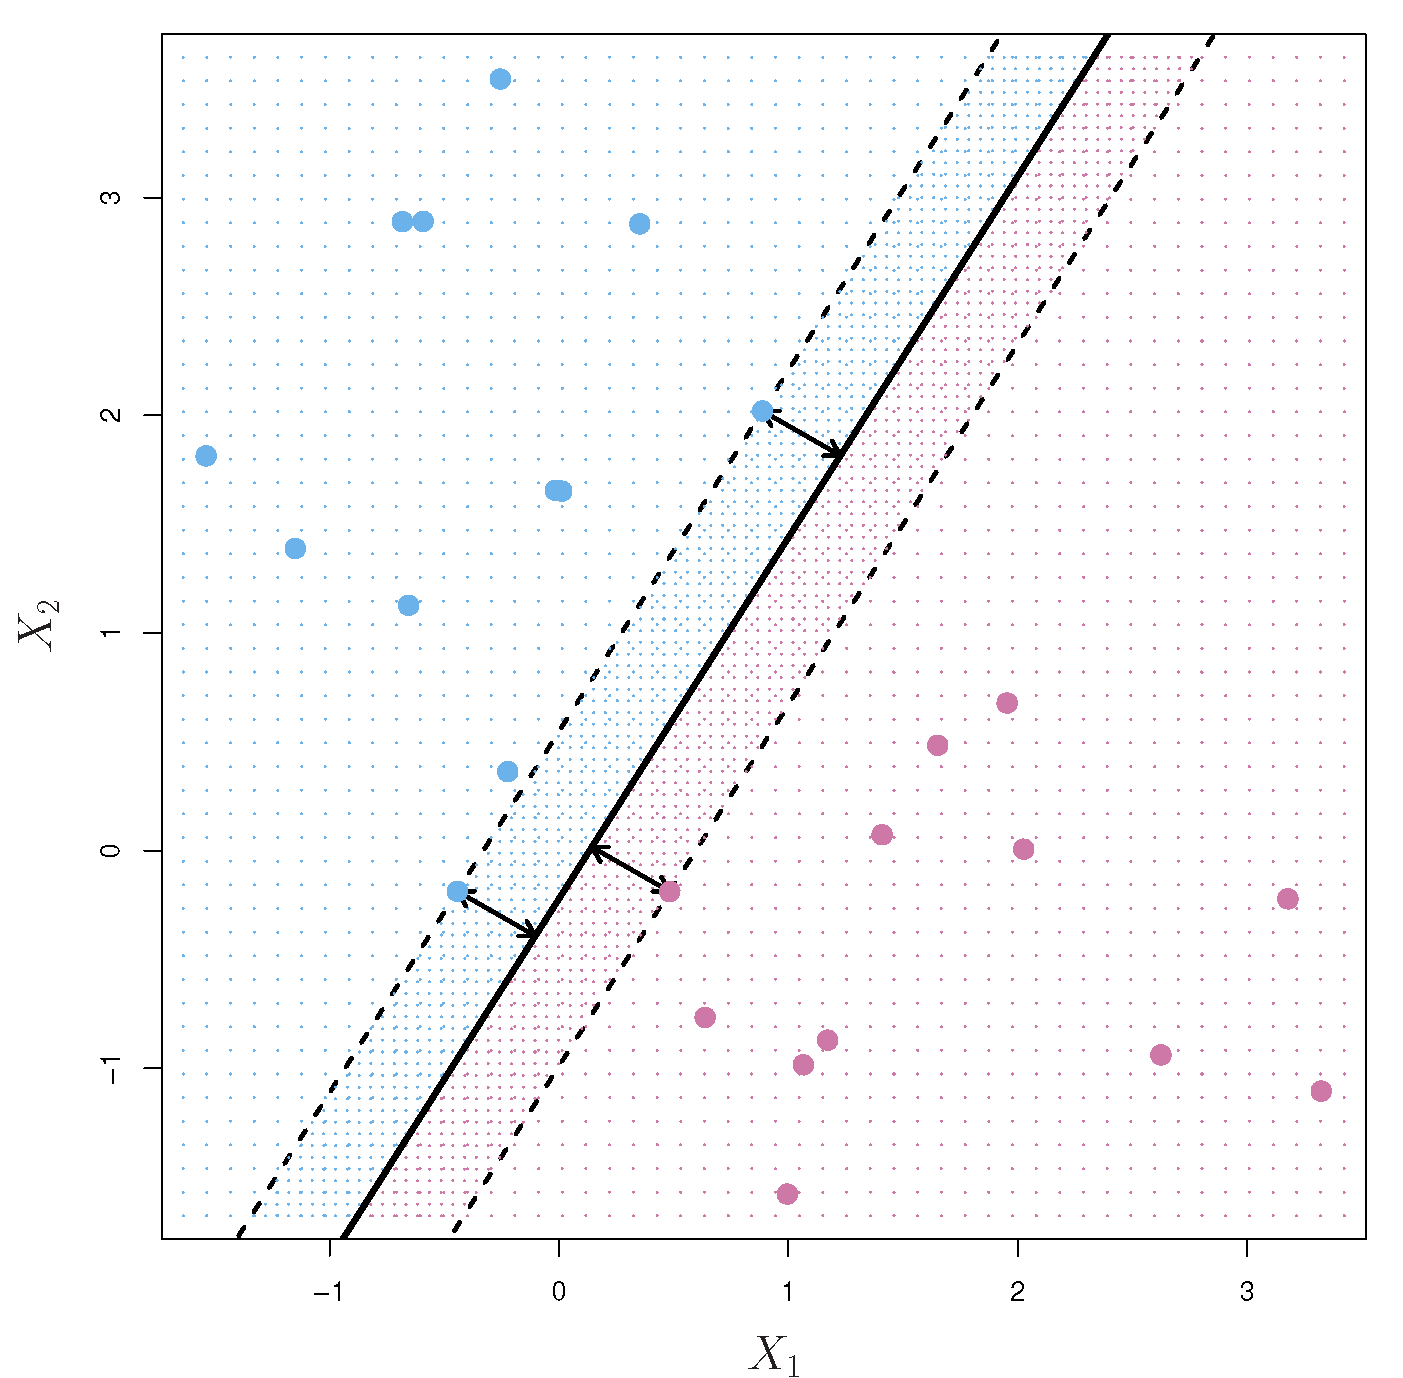

Some properties are notable about the maximal margin classifier, which will have an analogue with the support vector classifier of the next section and with the more general support vector machines. Note that the maximal margin hyperplane is defined by a relatively small number of observations. In the example above, the maximal margin hyperplane is defined by three observations. Adding more data with larger margins will not change the maximal margin classifier. The observations that define the maximal margin hyperplane are called the support vector.

In [ ]:
# See example at 
# http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
import numpy as np
from sklearn import svm
from sklearn.datasets import make_blobs

from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)
X1 = X[:, 0]
X2 = X[:, 1]

# Fit the model using support vector classifier method
# with high penalty for error terms (C=1000)
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

# Generate the scatterplot of the data
plt.scatter(X1, X2, c=y, s=30, cmap=plt.cm.Paired)

# Get the limits of X1 and X2
ax = plt.gca()
X1_lims = ax.get_xlim()
X2_lims = ax.get_ylim()

# create grid to evaluate model
X1_vec = np.linspace(X1_lims[0], X1_lims[1], 30)
X2_vec = np.linspace(X2_lims[0], X2_lims[1], 30)
X2_mat, X1_mat = np.meshgrid(X2_vec, X1_vec)
X1X2 = np.vstack([X1_mat.ravel(), X2_mat.ravel()]).T
y_hat = clf.decision_function(X1X2).reshape(X1_mat.shape)

# plot decision boundary and margins
ax.contour(X1_mat, X2_mat, y_hat, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='yellow')
# print(clf.support_vectors_)

## 2. Support vector classifiers
Most often, the data are not separable and cannot be perfectly classified by a single hyperplane. In these cases, the maximal margin classifier doesn not exist. The support vector classifier uses a *soft margin* such that the hyperplane does not perfectly predict the dependent variable. Intuitively, the support vector classifier maximizes the same margin $M$ but allows for positive errors for some observations (misclassification) subject to a "misclassification budget" $C$.

$$ \max_{\beta_0,\beta_1,\beta_2,...\beta_P, \epsilon_1, \epsilon_2, \epsilon_N ,M}\quad M $$
$$ \text{s.t}\quad \sum_{j=1}^P\beta^2_j = 1 $$
$$ \text{and}\quad y_i\left(\beta_0 + \beta_1 X_{1,i} + \beta_2 X_{2,i} + ...\beta_P X_{P,i}\right) \geq M(1-\epsilon_i) \quad\forall i=1,...N $$
$$ \epsilon_i \geq 0, \quad \sum_{i=1}^N \epsilon_i \leq C $$

Some key properties of the support vector classifier.
* The errors $\epsilon_i$ are called slack parameters, because they represent the Lagrangian multiplier of an occasionally binding constraint. $\epsilon_i=0$ when the constraint binds. $\epsilon_i>0$ when the constraint does not bind.
* If $y_i$ is on the wrong side of the margin $M$, then the error for that observation must be greater than one $\epsilon_i>1$
* If $y_i$ is between on margin and the hyperplane, but on the correct side of the hyperplane, then $\epsilon_i\in(0,1)$
* If $y_i$ is on the correct side of the hyperplane and outside of the margin, then $\epsilon_i=0$.
* $C$ is a tuning parameter that acts as an error budget. No more than $C$ observations can be on the wrong side of the hyperplane (misclassified). $C$ is generally chosen through cross validation.
* Observations that lie directly on the margin, or on the wrong side of the hyperplane are support vectors.

Figure 9.6 from James, et al (2013) shows two support vector classifiers. Identify the $\epsilon_i$ for each observation.

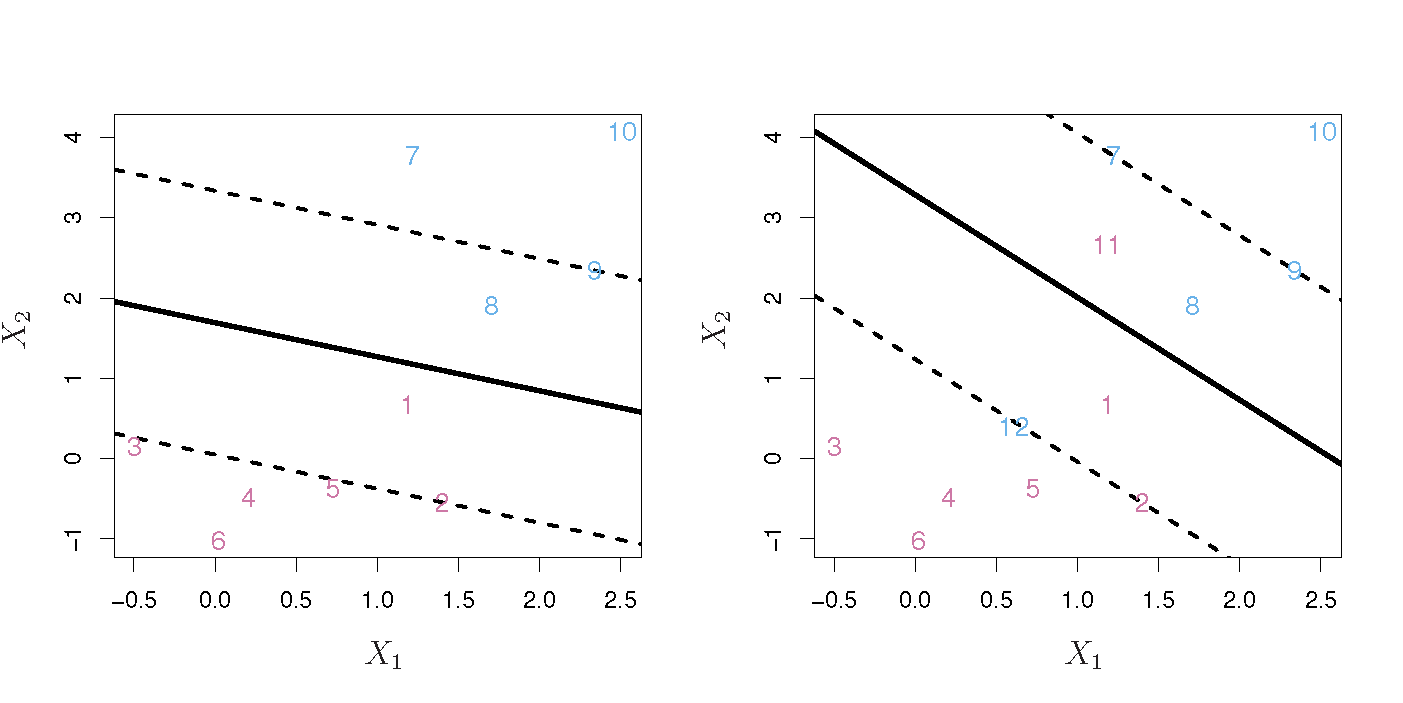

In [ ]:
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]  # petal length and petal width
X1 = X[:, 0]
X2 = X[:, 1]
y = (iris['target'] == 2).astype(np.float64)  # 1=Iris-Virginica, 0=not Iris-Virginica

plt.scatter(X1, X2, c=y, s=30, cmap=plt.cm.Paired)

# C in this function is slightly different from C in the above theory. C here is like the alpha
# in the lasso. It is a penalty on violations. Low C gives the fewest violations and the
# widest street. High C gives the most violations and the narrowest street.
svclf = Pipeline([('scaler', StandardScaler()), ('linear_svc', LinearSVC(loss='hinge', C=1000)),])
# svclf = LinearSVC(loss='hinge', C=1)
svclf.fit(X, y)

# Get the limits of X1 and X2
ax = plt.gca()
X1_lims = ax.get_xlim()
X2_lims = ax.get_ylim()

# create grid to evaluate model
X1_vec = np.linspace(X1_lims[0], X1_lims[1], 30)
X2_vec = np.linspace(X2_lims[0], X2_lims[1], 30)
X2_mat, X1_mat = np.meshgrid(X2_vec, X1_vec)
X1X2 = np.vstack([X1_mat.ravel(), X2_mat.ravel()]).T
y_hat = svclf.decision_function(X1X2).reshape(X1_mat.shape)

# plot decision boundary and margins
ax.contour(X1_mat, X2_mat, y_hat, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
# ax.scatter(svclf.support_vectors_[:, 0], svclf.support_vectors_[:, 1], s=100,
#            linewidth=1, facecolors='yellow')
# print(clf.support_vectors_)

## 3. Support Vector Machines (SVM)
The Support Vector Classifier of the last section is nice in that it allows for errors in the classification close to the boundary. But the linear boundary is a liability. The simplest way to expand the support vector classifier to include a nonlinear boundary is to include polynomial terms and cross product variables in the feature set. For example, instead of the simple feature set $(X_1,X_2,...X_P)$ of $P$ features, we could expand it to $2P$ features by adding squared terms for each of the features $(X^2_1,X^2_2,...X^2_P)$. The optimization problem would become the following:

$$ \max_{\beta_0, \beta_{1,1},\beta_{1,2},...\beta_{P,1}, \beta_{P,2}, \epsilon_1, \epsilon_2, \epsilon_N ,M}\quad M $$
$$ \text{s.t}\quad \sum_{j=1}^P\sum_{k=1}^2\beta^2_{j,k} = 1 $$
$$ \text{and}\quad y_i\left(\beta_0 + \sum_{j=1}^P\beta_{j,1} X_{j,i} + \sum_{j=1}^P\beta_{j,2} X^2_{j,i}\right) \geq M(1-\epsilon_i) \quad\forall i=1,...N $$
$$ \epsilon_i \geq 0, \quad \sum_{i=1}^N \epsilon_i \leq C $$

To explain the solution, think about the support vector classifier from the previous section. We estimated $P+1+N+1$ paramters $\beta_0,\beta_1,...\beta_P,\epsilon_1,...\epsilon_N, M$. However, some of the $\epsilon_i$ were 0. The only observations for which $\epsilon_i$ was positive were the observations in the support vector. And what mattered was the distance of those observations to the hyperplane.

It can be shown that the linear Support Vector Classifier from the previous section can be equivalently stated as the following,

$$ f(x) = \beta_0 + \sum_{i=1}^N\alpha_i\langle x, x_i\rangle $$

where $\langle x, x_i\rangle$ represents the inner product of $x$ and another set of features for observation $i$. The inner product is related to distance. Similarly the weights $\alpha_i$ are only positive for observations in the support vector. To estimate the parameters $\beta_0,\alpha_1,...\alpha_N$, one needs all the ${n \choose 2}$ inner products. The notation ${n \choose 2}$ is read "n choose 2" and signifies all the possible pairs that exist $N(N-1)/2$ among $N$ objects in a set.

Define the set of observations in the support vector as $\mathcal{S}$. Because only observations in the support vector will have positive weights $\alpha_i>0$, we can restate the more general linear version of the support vector classifier with inner products as the following.

$$ f(x) = \beta_0 + \sum_{i\in\mathcal{S}}\alpha_i\langle x, x_i\rangle $$

The inner product $\langle x, x_i\rangle$ is a single specification of a more general object called a *kernel*. A *kernel* is a function that measures the similarity or distance of two observations. The inner product is one possible kernel. We could write the support vector classifier as a more general classifier that is a function measures of data similarity that are the general *kernel* $K(x, x_i)$.

$$ f(x) = \beta_0 + \sum_{i\in\mathcal{S}}\alpha_i K(x, x_i) $$

When the kernel is the inner product, the model is the support vector classifier. When the kernel is more general, the classifier is a **support vector machine**.

One possible kernel, beyond the inner product kernel, is the polynomial kernel of polynomial degree $d$. An SVM with a polynomial kernel of degree $d=3$ is shown on the left side of Figure 9.9 from James, et al (2013). Note how this kernel allows for two borders, each of which is nonlinear.

$$ K(x_i, x_{i'}) = \left(1 + \sum_{j=1}^p x_{j,i} x_{j,i'}\right)^d $$

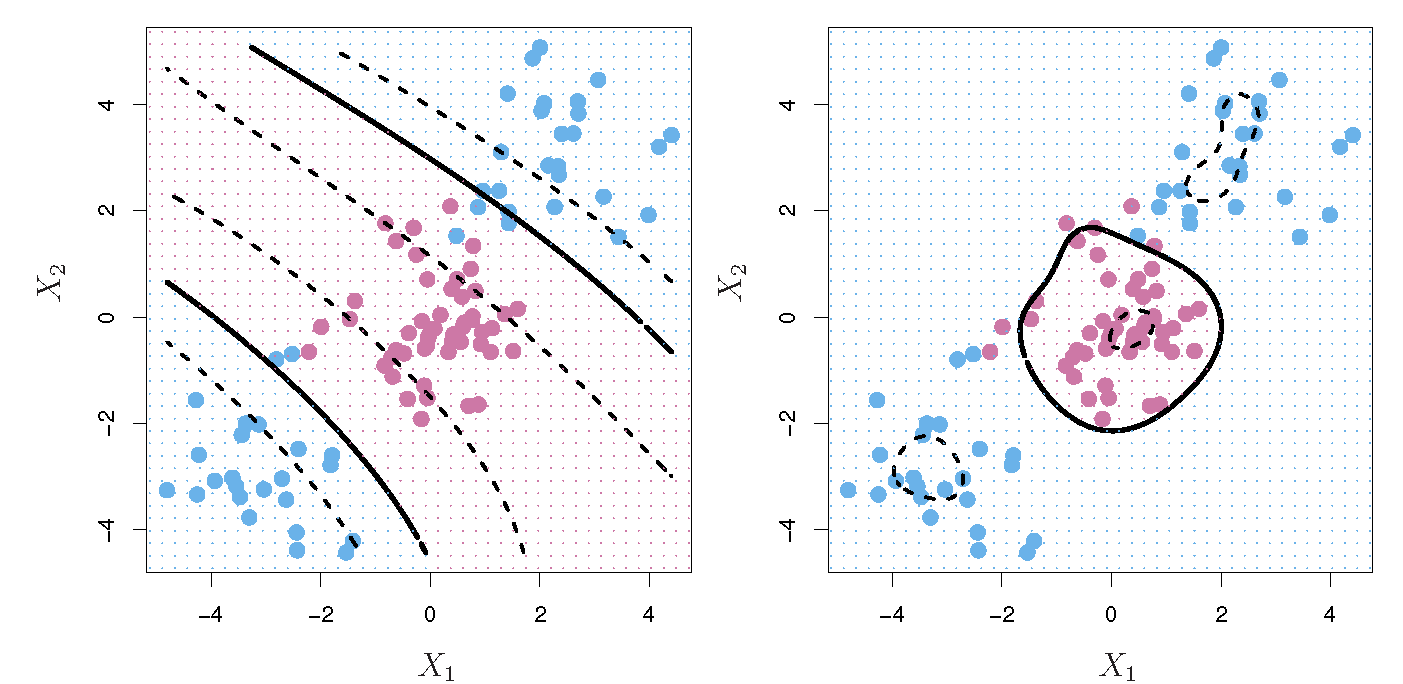

Another popular kernel for the SVM is the radial kernel, sometimes also called the Gaussian kernel or the radial basis function (RBF) kernel. The right panel of Figure 9.9 shows a radial kernel SVM classifier fit to the data.

$$ K(x_i, x_{i'}) = \exp\Bigl(-\gamma\sum_{j=1}^p\left(x_{j,i} - x_{j,i'}\right)^2\Bigr) $$

Using kernels is a clever way to leverage the linearity of the support vector classifier methodology, but then use very rich functions to measure distance of each point from each other. The following four panels in two figures, 9.10 and 9.11 from James, et al (2013), compares the performance of radial kernel SVM's with different $\gamma$ tuning parameters versus LDA and support vector classifier. SVM performs well.

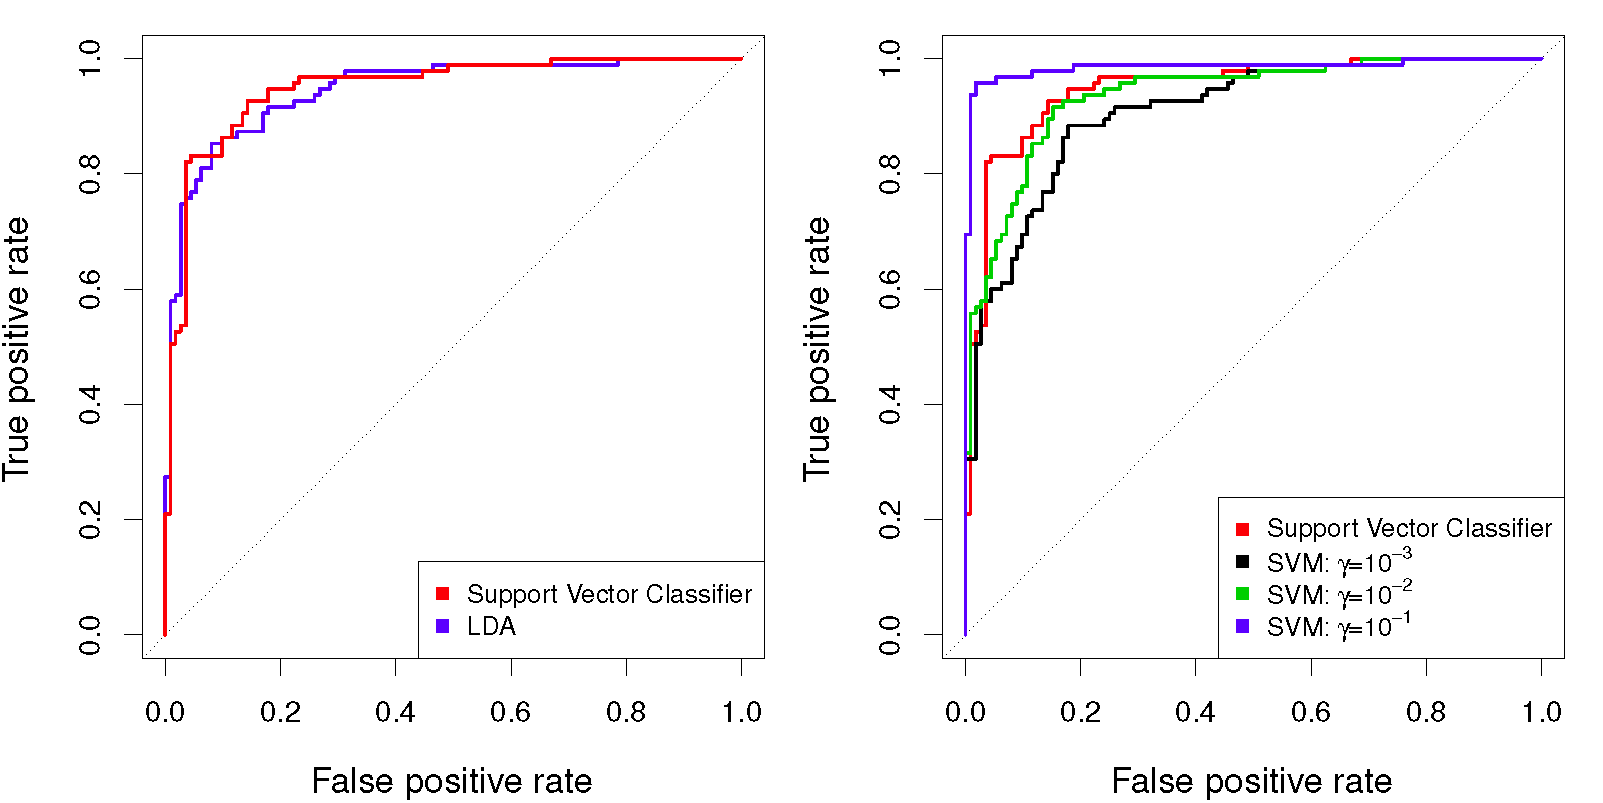

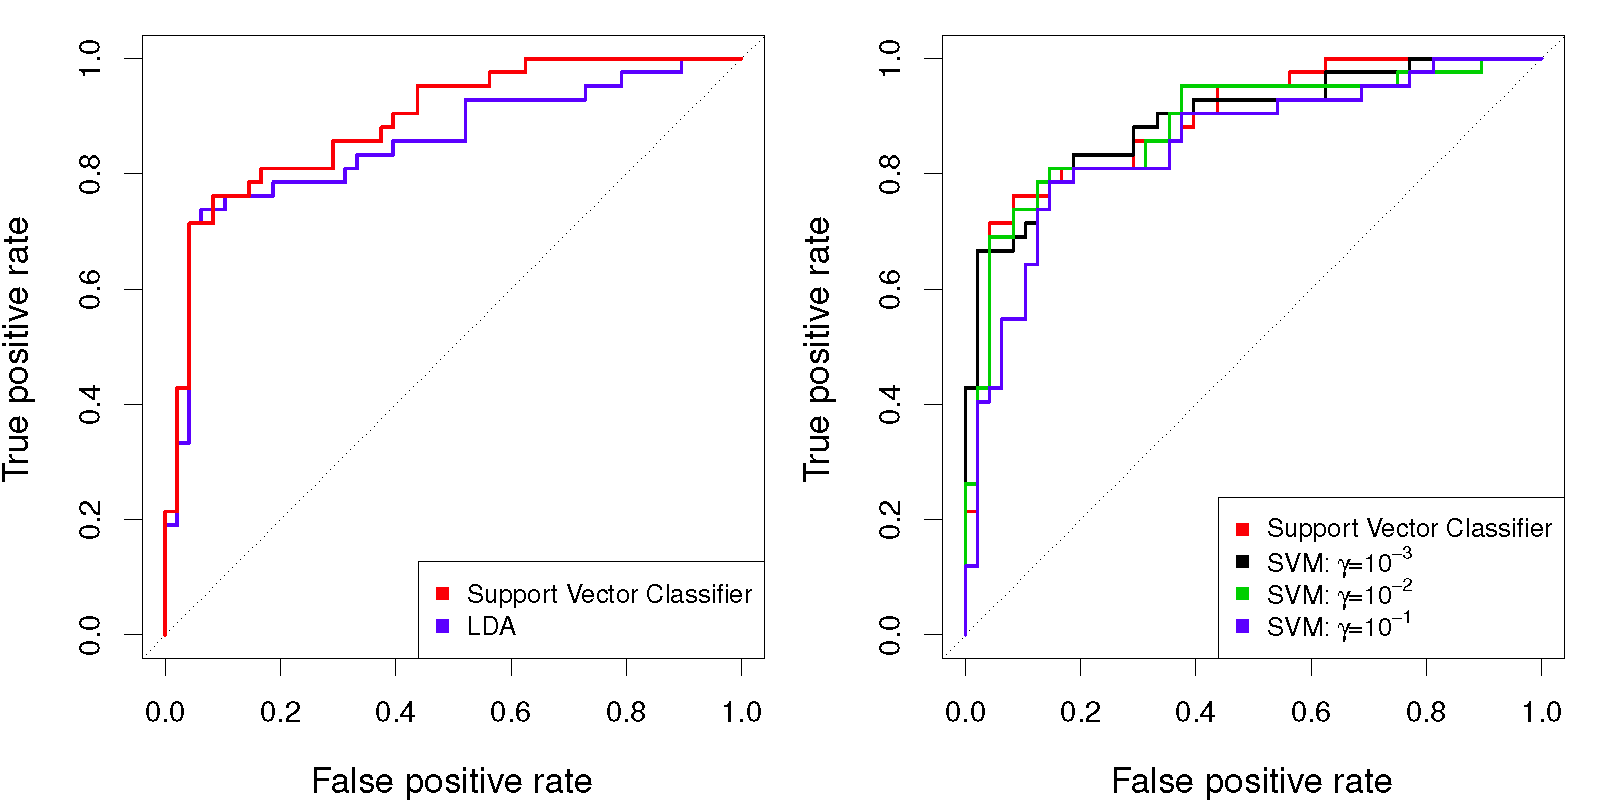

In [ ]:
# This example is taken from the scikit-learn documentation
# http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
import numpy as np
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.5, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

Now let's compute some error rates and see how well each of the above models predicts flower type.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=18)

svc_lin1 = svm.SVC(kernel='linear', C=C)
svc_lin1.fit(X_train, y_train)
y_pred_lin1 = svc_lin1.predict(X_test)
print(classification_report(y_test, y_pred_lin1))
pred_wrong_lin1 = y_pred_lin1 != y_test
MSE_lin1 = pred_wrong_lin1.mean()
print('lin1 MSE for test set is', MSE_lin1)
error0_lin1 = (((y_test == 0) * (pred_wrong_lin1)).sum() /
               (y_test == 0).sum())
print('j=0 error rate for lin1 is', error0_lin1)
error1_lin1 = (((y_test == 1) * (pred_wrong_lin1)).sum() /
               (y_test == 1).sum())
print('j=1 error rate for lin1 is', error1_lin1)
error2_lin1 = (((y_test == 2) * (pred_wrong_lin1)).sum() /
               (y_test == 2).sum())
print('j=2 error rate for lin1 is', error2_lin1)

svc_lin2 = svm.LinearSVC(C=C)
svc_lin2.fit(X_train, y_train)
y_pred_lin2 = svc_lin2.predict(X_test)
print(classification_report(y_test, y_pred_lin2))
pred_wrong_lin2 = y_pred_lin2 != y_test
MSE_lin2 = pred_wrong_lin2.mean()
print('lin2 MSE for test set is', MSE_lin2)
error0_lin2 = (((y_test == 0) * (pred_wrong_lin2)).sum() /
               (y_test == 0).sum())
print('j=0 error rate for lin2 is', error0_lin2)
error1_lin2 = (((y_test == 1) * (pred_wrong_lin2)).sum() /
               (y_test == 1).sum())
print('j=1 error rate for lin2 is', error1_lin2)
error2_lin2 = (((y_test == 2) * (pred_wrong_lin2)).sum() /
               (y_test == 2).sum())
print('j=2 error rate for lin2 is', error2_lin2)

svc_rbf = svm.SVC(kernel='rbf', gamma=0.5, C=C)
svc_rbf.fit(X_train, y_train)
y_pred_rbf = svc_rbf.predict(X_test)
print(classification_report(y_test, y_pred_rbf))
pred_wrong_rbf = y_pred_rbf != y_test
MSE_rbf = pred_wrong_rbf.mean()
print('RBF MSE for test set is', MSE_rbf)
error0_rbf = (((y_test == 0) * (pred_wrong_rbf)).sum() /
               (y_test == 0).sum())
print('j=0 error rate for rbf is', error0_rbf)
error1_rbf = (((y_test == 1) * (pred_wrong_rbf)).sum() /
               (y_test == 1).sum())
print('j=1 error rate for rbf is', error1_rbf)
error2_rbf = (((y_test == 2) * (pred_wrong_rbf)).sum() /
               (y_test == 2).sum())
print('j=2 error rate for rbf is', error2_rbf)

svc_pol = svm.SVC(kernel='poly', degree=3, C=C)
svc_pol.fit(X_train, y_train)
y_pred_pol = svc_pol.predict(X_test)
print(classification_report(y_test, y_pred_pol))
pred_wrong_pol = y_pred_pol != y_test
MSE_pol = pred_wrong_pol.mean()
print('Pol MSE for test set is', MSE_pol)
error0_pol = (((y_test == 0) * (pred_wrong_pol)).sum() /
               (y_test == 0).sum())
print('j=0 error rate for pol is', error0_pol)
error1_pol = (((y_test == 1) * (pred_wrong_pol)).sum() /
               (y_test == 1).sum())
print('j=1 error rate for pol is', error1_pol)
error2_pol = (((y_test == 2) * (pred_wrong_pol)).sum() /
               (y_test == 2).sum())
print('j=2 error rate for pol is', error2_pol)

## 4. Higher order SVM
SVM can also be used to classify data with more than two categories $K>2$. This is an SVM ensemble method.

The first approach is a *one-versus-one* or *all-pairs* ensemble. This approach estimates a binary SVM on all pairs of categories ${K \choose 2}$ and then use a majority vote classification rule as the prediction rule.

A second approach is a *one-versus-all* ensemble. In this method, one estimates $K$ binary SVM's where the dependent variable is one class versus the rest of the classes. Again, the prediction rule is a majority vote classification rule.

## 5. When to use SVM versus Random Forest
Cross-validation on test sets is the only sure way to compare the accuracy of two prediction models. However, the following are some "rules of thumb" that can hold in general.

Random forest positives.
* Random forests are usually better suited for $K>2$ categorical dependent variable problems.
* Random forests are work well when the feature variables include a mixture of categorical and continuous features.
* Random forests scale well with number of observations

Random forest negatives.
* Random forests do not scale well with number of features.

SVM positives
* SVM is often best for binary classification.
* SVM scales well with the number of features.
* SVM is not influenced by more predictable points.

SVM negatives
* SVM does not scale well for large $N>100,000$.
* SVM can be heavily influenced by outliers and points within the margin (support vectors).

## References
* James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani, [*An Introduction to Statistical Learning with Applications in R*](http://link.springer.com.proxy.uchicago.edu/book/10.1007%2F978-1-4614-7138-7), New York, Springer (2013).
* Geron, Aurelien, *Hands-On Machine Learning with Scikit-Learn & TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems*, O'Reilly (2017).